# Classifying Satellite Images
DeepSat(SAT-6) Airborne Dataset
dataset from https://www.kaggle.com/crawford/deepsat-sat6
modified from https://www.kaggle.com/bhumitadivarekar/simple-keras-cnn-with-95-13-accuracy

## Prepare dataset

In [1]:
#require panadasy
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

# Method to load data and images
def load_data_and_labels(data, labels):
    data_df = pd.read_csv(data, header=None)
    X = data_df.values.reshape((-1,28,28,4)).clip(0,255).astype(np.uint8)
    labels_df = pd.read_csv(labels, header=None)
    Y = labels_df.values.getfield(dtype=np.int8)
    return X, Y

data_dir = '/home/wangj/deepsat_sat6'

x_train, y_train = load_data_and_labels(data='{}/X_train_sat6.csv'.format(data_dir),
                                        labels='{}/y_train_sat6.csv'.format(data_dir))
x_test, y_test = load_data_and_labels(data='{}/X_test_sat6.csv'.format(data_dir),
                                      labels='{}/y_test_sat6.csv'.format(data_dir))

print(pd.read_csv('{}/sat6annotations.csv'.format(data_dir), header=None))

# Print shape of all training, testing data and labels
# Labels are already loaded in one-hot encoded format
print('x_train_shape : {}'.format(x_train.shape)) # (324000, 28, 28, 4)
print('y_train_shape : {}'.format(y_train.shape)) # (324000, 6)
print('x_test_shape : {}'.format(x_test.shape))   # (81000, 28, 28, 4)
print('y_test_shape : {}'.format(y_test.shape))  # (81000, 6)

             0  1  2  3  4  5  6
0     building  1  0  0  0  0  0
1  barren_land  0  1  0  0  0  0
2        trees  0  0  1  0  0  0
3    grassland  0  0  0  1  0  0
4         road  0  0  0  0  1  0
5        water  0  0  0  0  0  1
x_train_shape : (324000, 28, 28, 4)
y_train_shape : (324000, 6)
x_test_shape : (81000, 28, 28, 4)
y_test_shape : (81000, 6)


## Check dataset

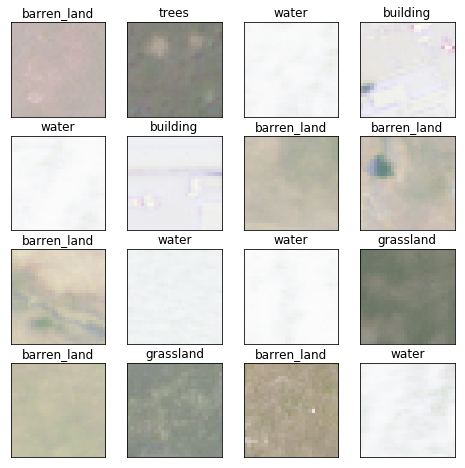

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
class_names = ['building','barren_land','trees',
               'grassland','road','water']

for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(324000)
    im = x_train[img_id,::]
    plt.title(class_names[y_train[img_id].argmax()])
    plt.imshow(im)
plt.show()

## Create model

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
#Create model
model = Sequential()

#Add layers
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,4)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

#configure model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        592       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
__________

## Train model

In [7]:
model.fit(x_train, y_train, batch_size=200,
          epochs=6, verbose=1)

Epoch 1/6
324000/324000 [==============================] - 19s 57us/step - loss: 0.2232 - acc: 0.9447
Epoch 2/6
324000/324000 [==============================] - 18s 55us/step - loss: 0.0671 - acc: 0.9759
Epoch 3/6
324000/324000 [==============================] - 18s 56us/step - loss: 0.0543 - acc: 0.9807
Epoch 4/6
324000/324000 [==============================] - 18s 56us/step - loss: 0.0494 - acc: 0.9828
Epoch 5/6
324000/324000 [==============================] - 18s 55us/step - loss: 0.0444 - acc: 0.9843
Epoch 6/6
324000/324000 [==============================] - 16s 51us/step - loss: 0.0436 - acc: 0.9848


## Test model

In [11]:
# test trained model.
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

81000/81000 [==============================] - 7s 92us/step
Test loss: 0.05314111559916529
Test accuracy: 0.9801851851851852


## Check predictions

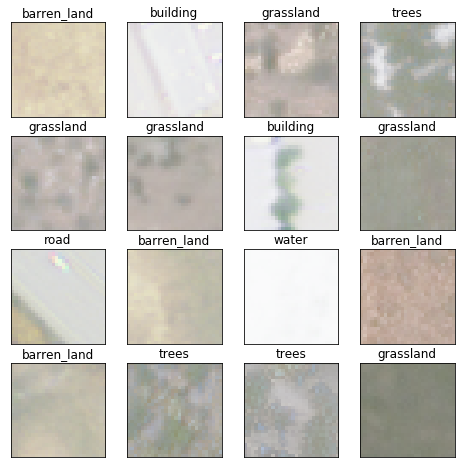

In [15]:
preds = model.predict(x_test)
plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(81000)
    im = x_test[img_id,::]
    plt.title(class_names[preds[img_id].argmax()])
    plt.imshow(im)
plt.show()